### カリキュラム - 【AIコース】CNNによる画像分類 発展2

In [1]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows = X_train[0].shape[1]
img_cols = X_train[0].shape[0]
num_classes = len(set(y_train))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = X_train.shape[1:4]

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.
/Users/yasu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# LeNet
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(6,
                 kernel_size = (5, 5),
                 strides = (1, 1),
                 padding = "same",
                 activation = "relu",
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2),
                       strides = (2, 2),
                       padding = "valid"))
model.add(Conv2D(16, 
                 kernel_size = (5, 5),
                 strides = (1, 1),
                 padding = "same",
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2),
                       strides = (2, 2),
                       padding = "valid"))

model.add(Flatten())

model.add(Dense(120, activation = "relu"))
model.add(Dense(84, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

In [4]:
model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 3,
          verbose = 1,
          validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 29s 488us/step - loss: 0.3354 - acc: 0.8946 - val_loss: 0.0901 - val_acc: 0.9721

#### ・層の確認

In [5]:
layers = model.layers
for i, l in enumerate(layers):
    print(i, l)

0 <keras.layers.convolutional.Conv2D object at 0x127fcbe10>
1 <keras.layers.pooling.MaxPooling2D object at 0x127fcbe80>
2 <keras.layers.convolutional.Conv2D object at 0x127fed828>
3 <keras.layers.pooling.MaxPooling2D object at 0x127fed710>
4 <keras.layers.core.Flatten object at 0x127fce3c8>
5 <keras.layers.core.Dense object at 0x128030c88>
6 <keras.layers.core.Dense object at 0x1280025f8>
7 <keras.layers.core.Dense object at 0x128040d30>


#### ・重みの取得

In [23]:
w0 = model.layers[0].get_weights()[0]
print(w0.shape)

(5, 5, 1, 6)


In [24]:
print(w0[:,:,:,0])

[[[ 0.2496096 ]
  [ 0.26616809]
  [ 0.26201352]
  [ 0.38823804]
  [ 0.41325337]]

 [[ 0.09923398]
  [ 0.1880822 ]
  [ 0.06546573]
  [ 0.03665831]
  [ 0.04362463]]

 [[-0.20878084]
  [-0.02533463]
  [ 0.08149851]
  [ 0.06263901]
  [ 0.09358653]]

 [[-0.21160702]
  [-0.11848862]
  [-0.29811975]
  [-0.18967937]
  [-0.05146   ]]

 [[-0.24405549]
  [-0.27147087]
  [-0.16485325]
  [-0.27490556]
  [-0.2385148 ]]]


#### ・重みの可視化

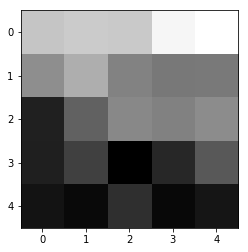

In [25]:
import matplotlib.pyplot as plt
plt.imshow(w0[:,:,0,0], cmap = "gray", interpolation = "none")
plt.show()

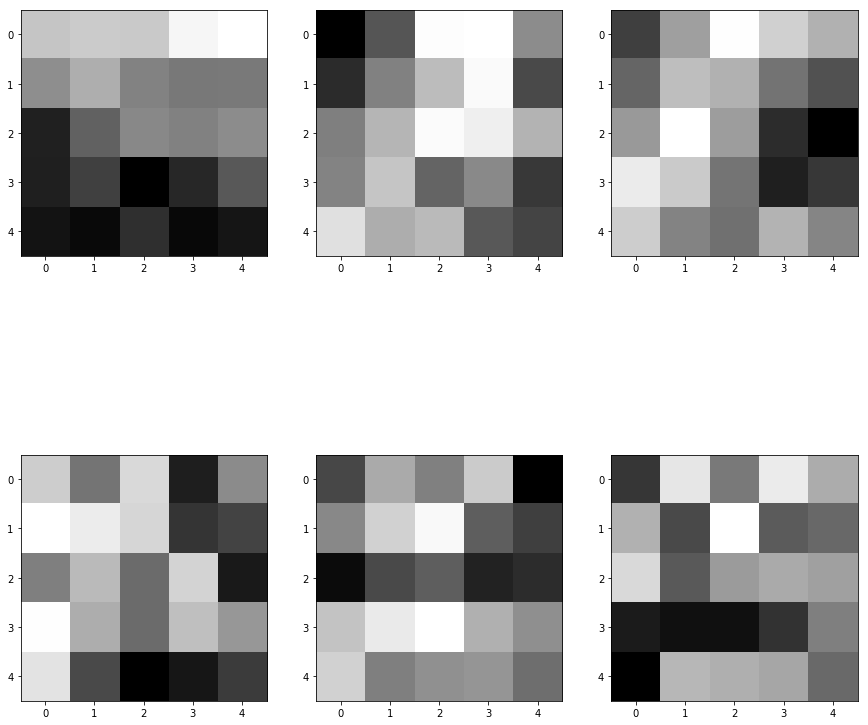

In [26]:
plt.figure(figsize = (15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(w0[:,:,0,i], cmap = "gray", interpolation = "none")
plt.show()